In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("SalaryData.csv")
data.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [3]:
data.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


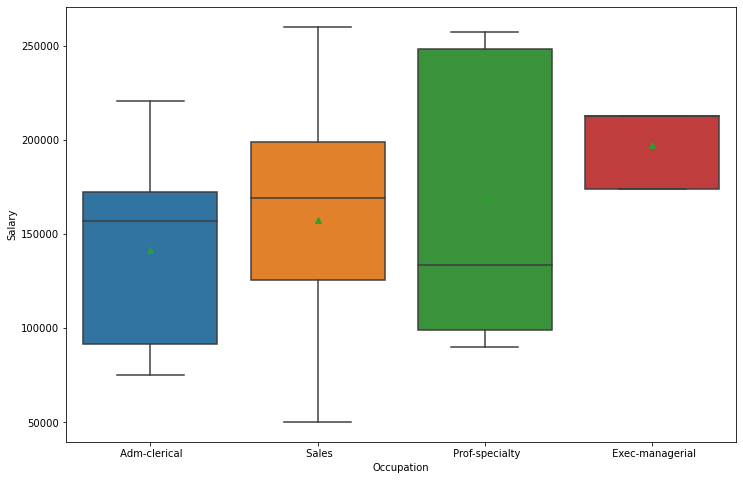

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot('Occupation','Salary',data=data,showmeans=True);

In [6]:
formula='Salary~C(Education)+C(Occupation)'
mod=ols(formula,data).fit()
aov_table=anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [7]:
formula='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
mod=ols(formula,data).fit()
aov_table=anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


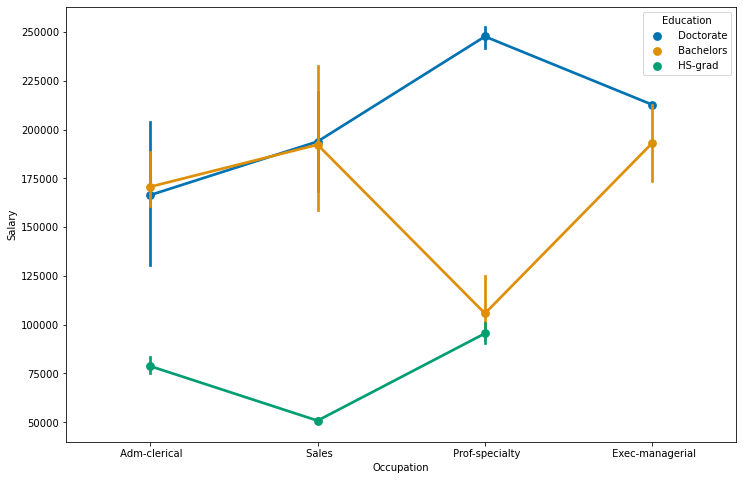

In [8]:
plt.figure(figsize=(12,8))
sns.pointplot(data=data,x='Occupation',y='Salary',hue='Education',palette='colorblind');

In [9]:
formula='Salary~C(Education)'
mod=ols(formula,data).fit()
aov_table=anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


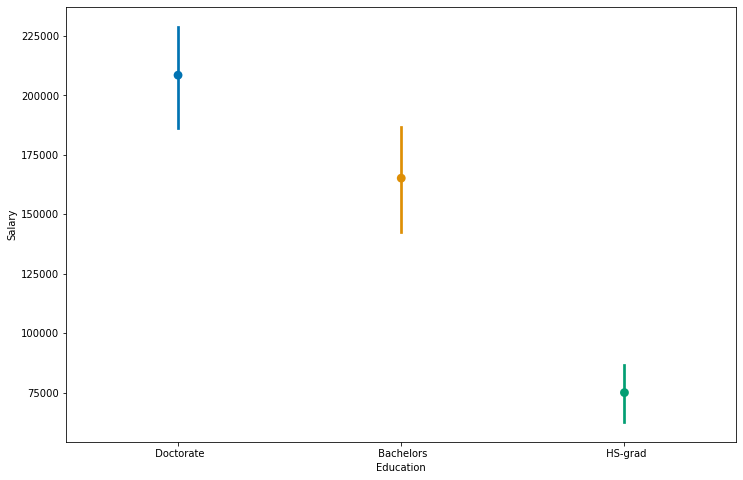

In [10]:
plt.figure(figsize=(12,8))
sns.pointplot(data=data,x='Education',y='Salary',palette='colorblind');

In [11]:
formula='Salary~C(Occupation)'
mod=ols(formula,data).fit()
aov_table=anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


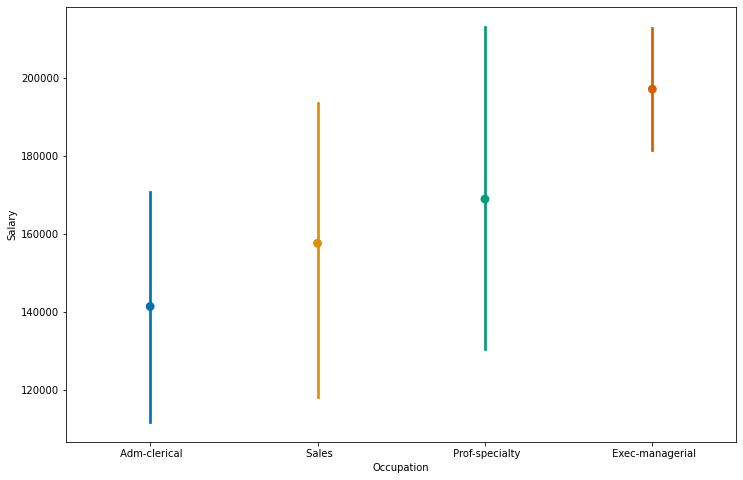

In [12]:
plt.figure(figsize=(12,8))
sns.pointplot(data=data,x='Occupation',y='Salary',palette='colorblind');

In [13]:
tukey=pairwise_tukeyhsd(endog=data['Salary'],groups=data['Education'],alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


# Problem2:
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [14]:
df=pd.read_csv("Education_Post_12th_Standard.csv")
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
df.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [16]:
df.shape

(777, 18)

In [17]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [20]:
df.duplicated().sum()

0

# UnivariateAnalysis

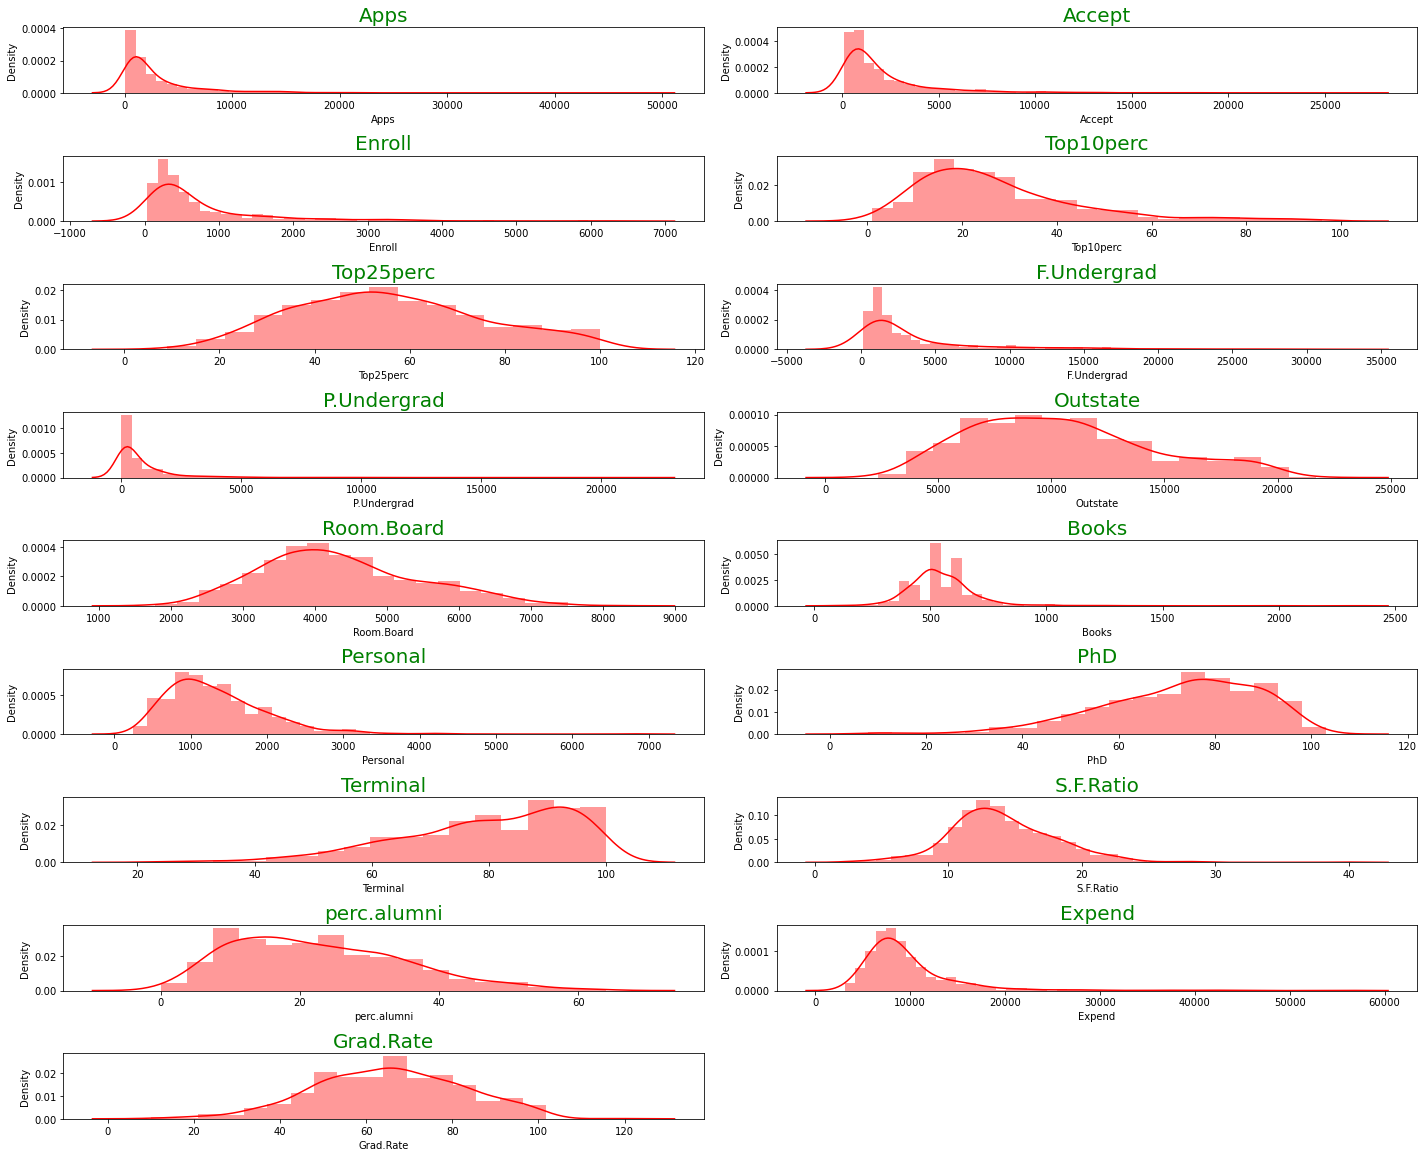

In [21]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(17,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],color='r',label=None)
    ax.set_title(data_plot.columns[i],color='green',fontsize='20')
plt.tight_layout()

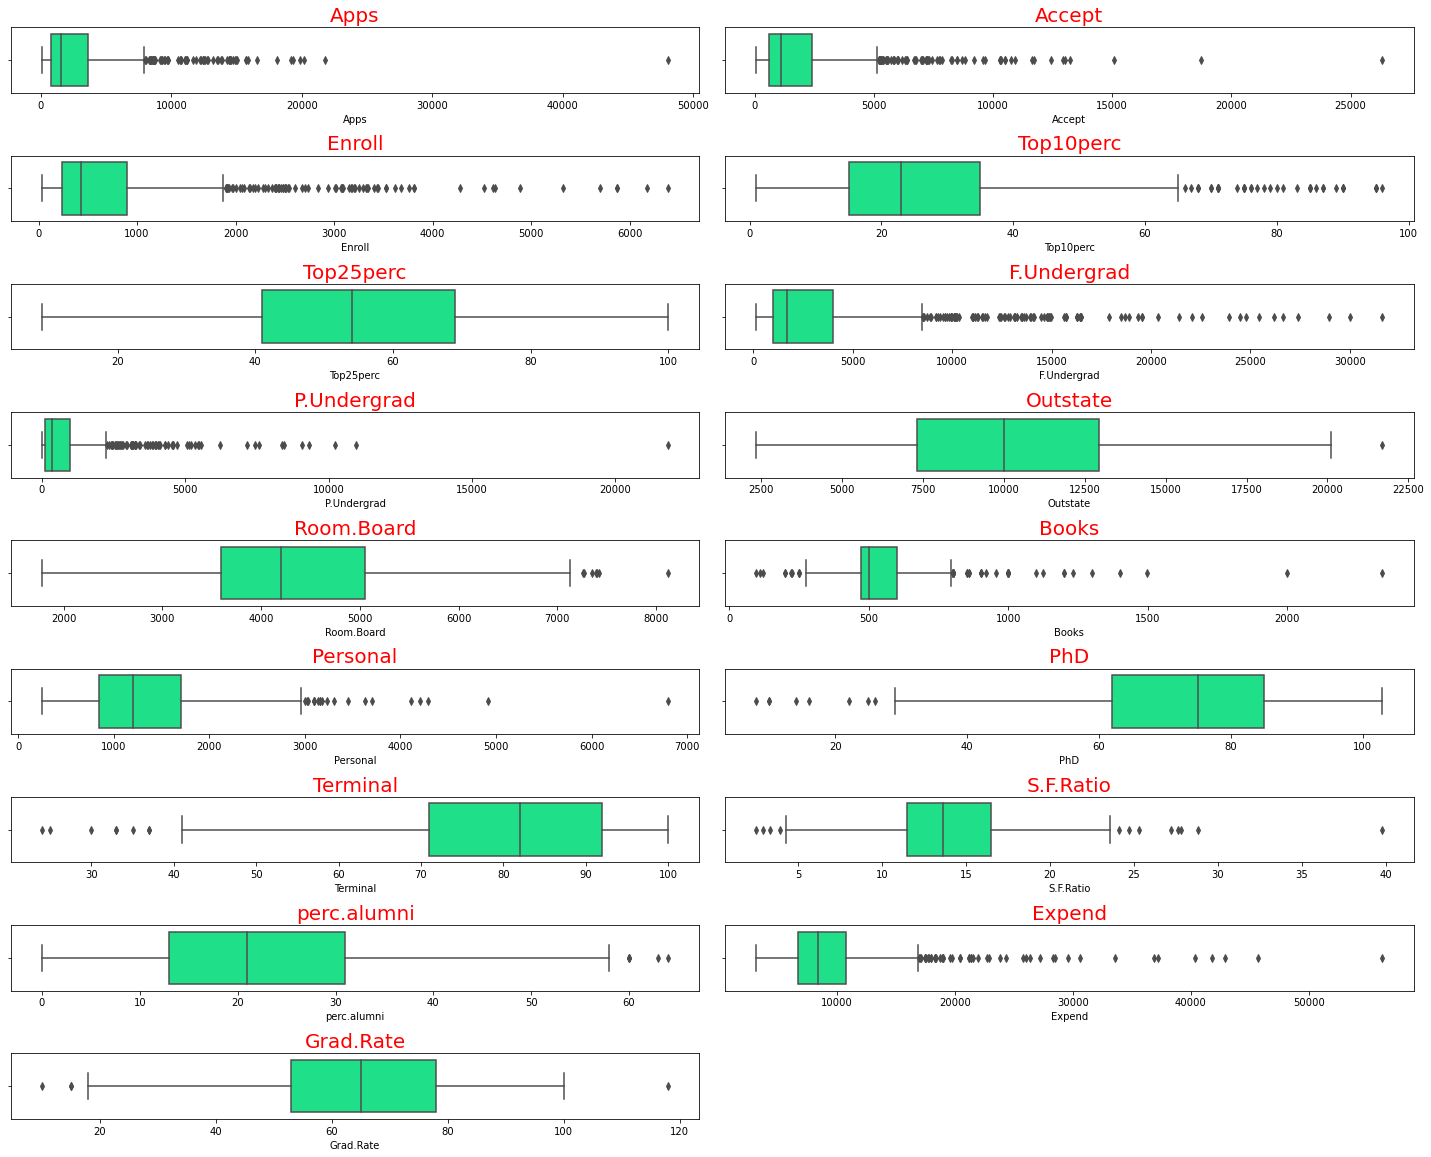

In [22]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(17,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],palette='gist_rainbow')
    ax.set_title(data_plot.columns[i],color='red',fontsize='20')
plt.tight_layout()

In [23]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


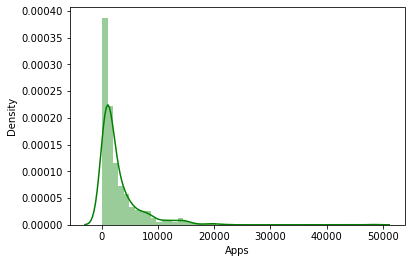

BoxPlot of Apps
----------------------------------------------------------------------------


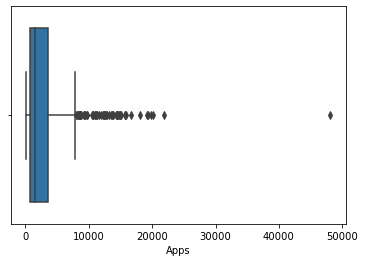

In [24]:
univariateAnalysis_numeric('Apps',20)

In [25]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


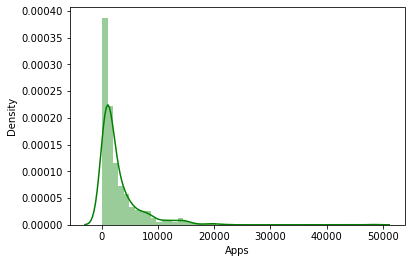

BoxPlot of Apps
----------------------------------------------------------------------------


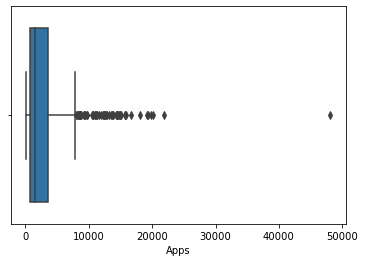

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


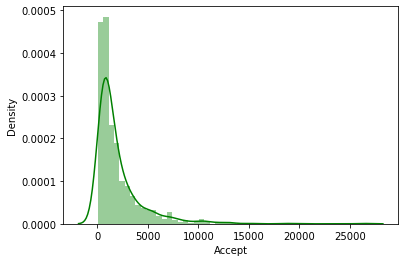

BoxPlot of Accept
----------------------------------------------------------------------------


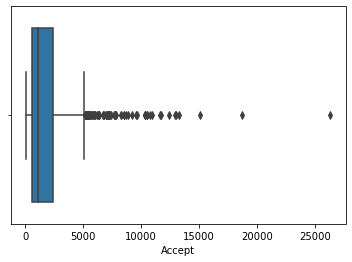

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


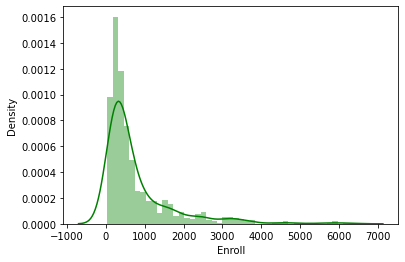

BoxPlot of Enroll
----------------------------------------------------------------------------


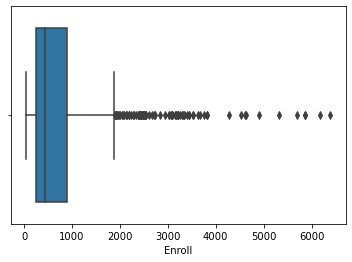

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


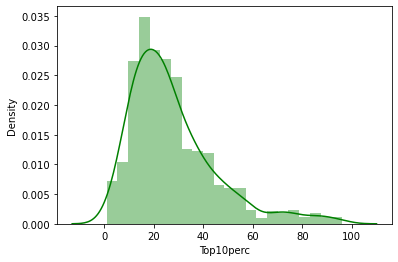

BoxPlot of Top10perc
----------------------------------------------------------------------------


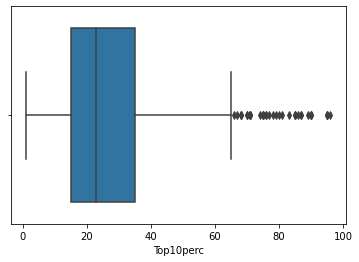

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


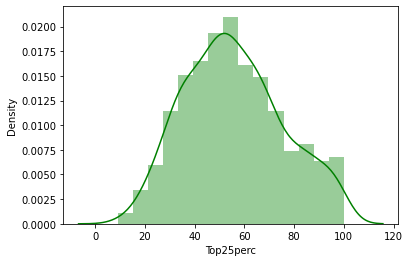

BoxPlot of Top25perc
----------------------------------------------------------------------------


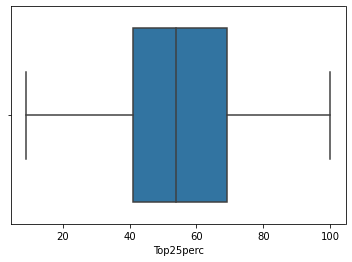

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


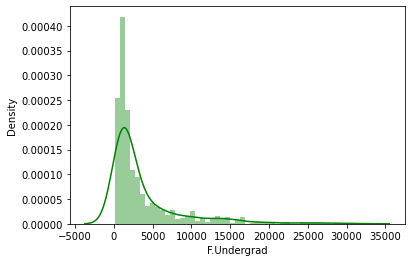

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


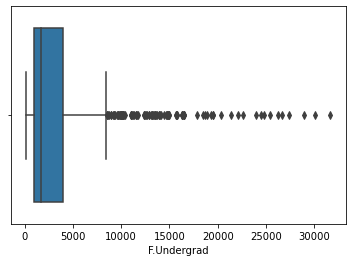

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


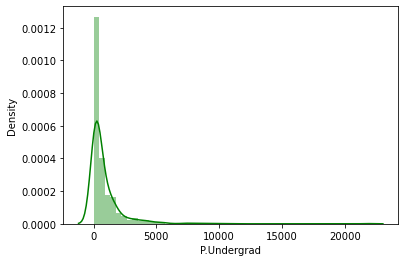

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


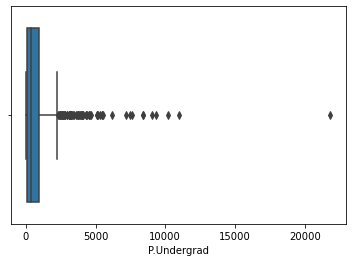

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


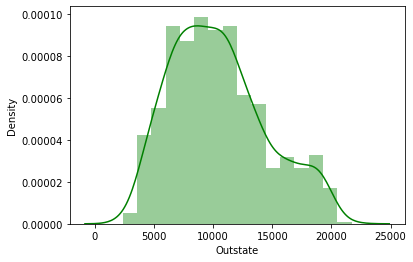

BoxPlot of Outstate
----------------------------------------------------------------------------


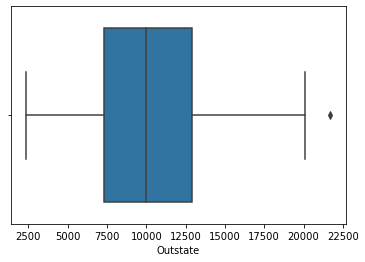

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


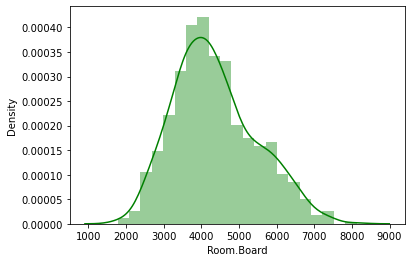

BoxPlot of Room.Board
----------------------------------------------------------------------------


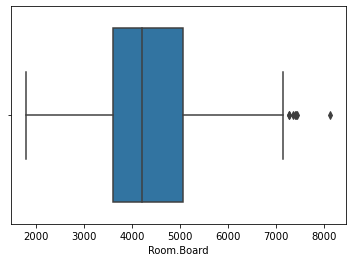

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


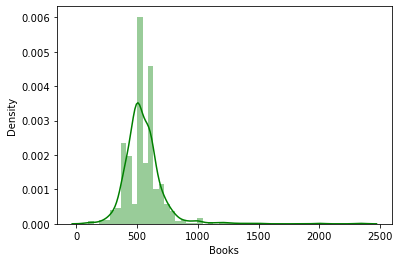

BoxPlot of Books
----------------------------------------------------------------------------


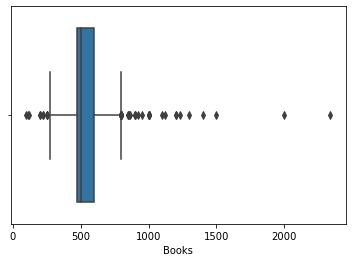

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


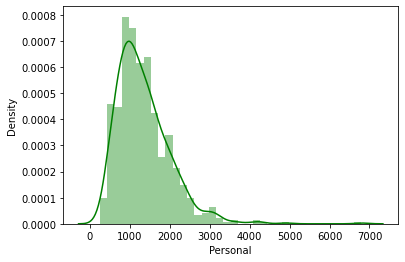

BoxPlot of Personal
----------------------------------------------------------------------------


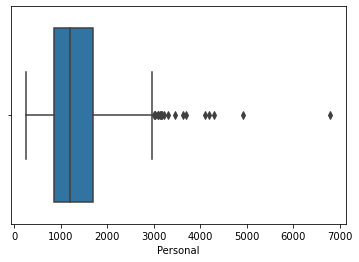

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


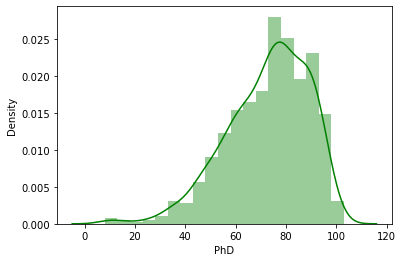

BoxPlot of PhD
----------------------------------------------------------------------------


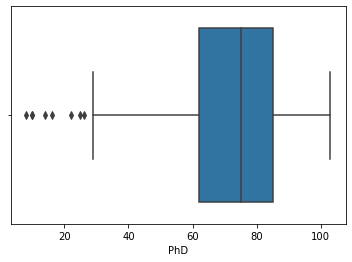

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


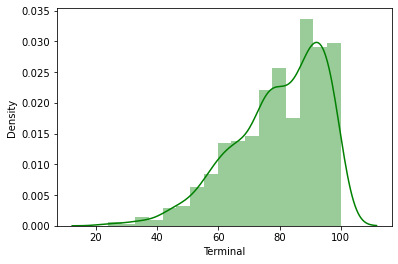

BoxPlot of Terminal
----------------------------------------------------------------------------


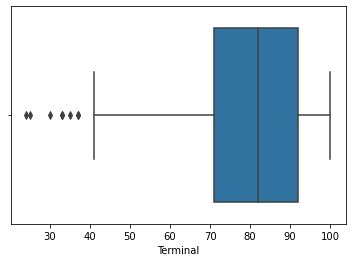

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


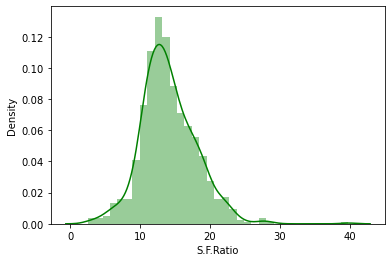

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


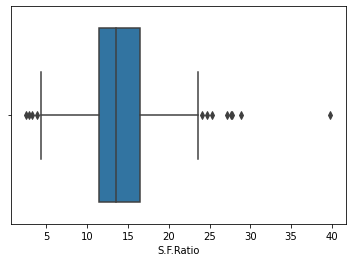

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


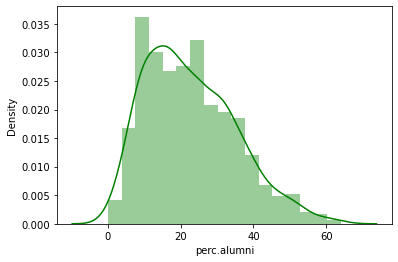

BoxPlot of perc.alumni
----------------------------------------------------------------------------


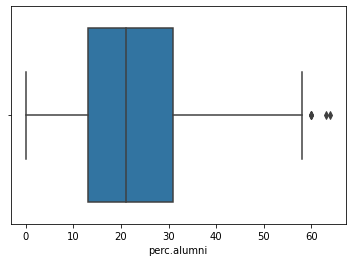

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


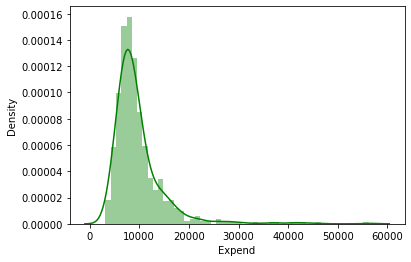

BoxPlot of Expend
----------------------------------------------------------------------------


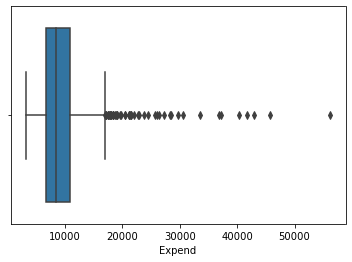

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


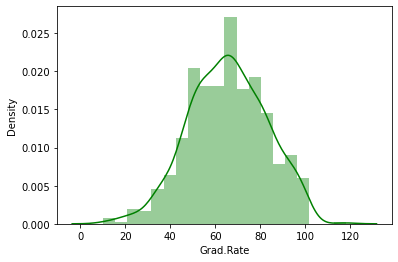

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


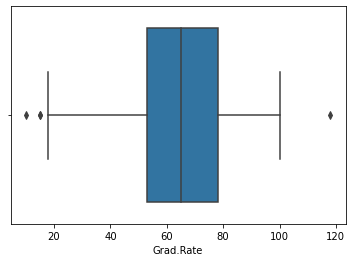

In [26]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [27]:
df.skew(axis=0,numeric_only=True)

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

# MULTIVARIATE ANALYSIS

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


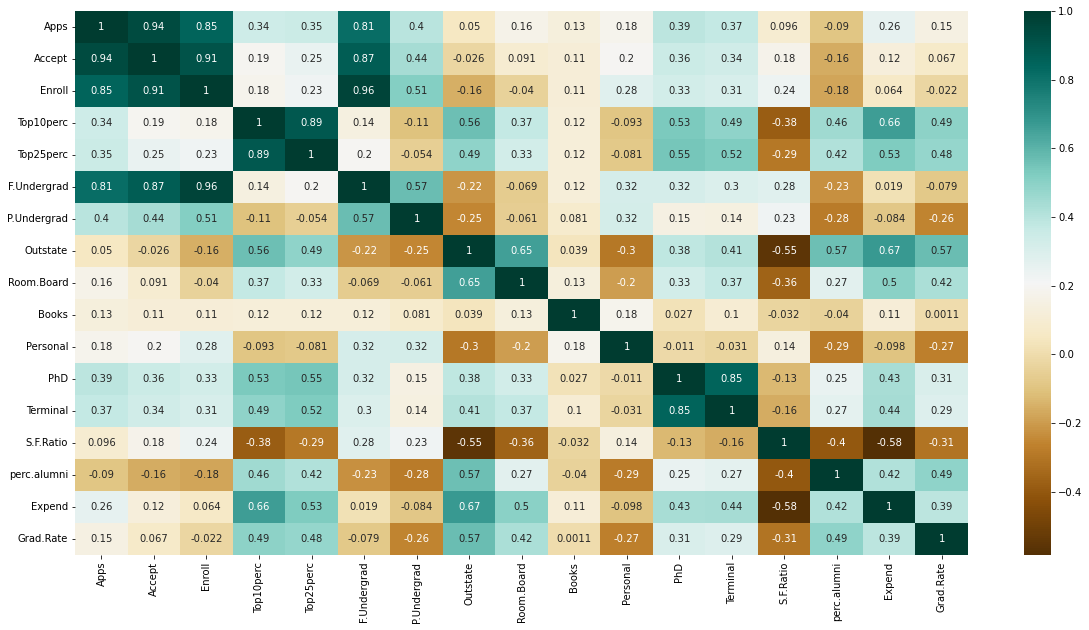

In [28]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(df.corr(),cmap='BrBG',annot=True)
c

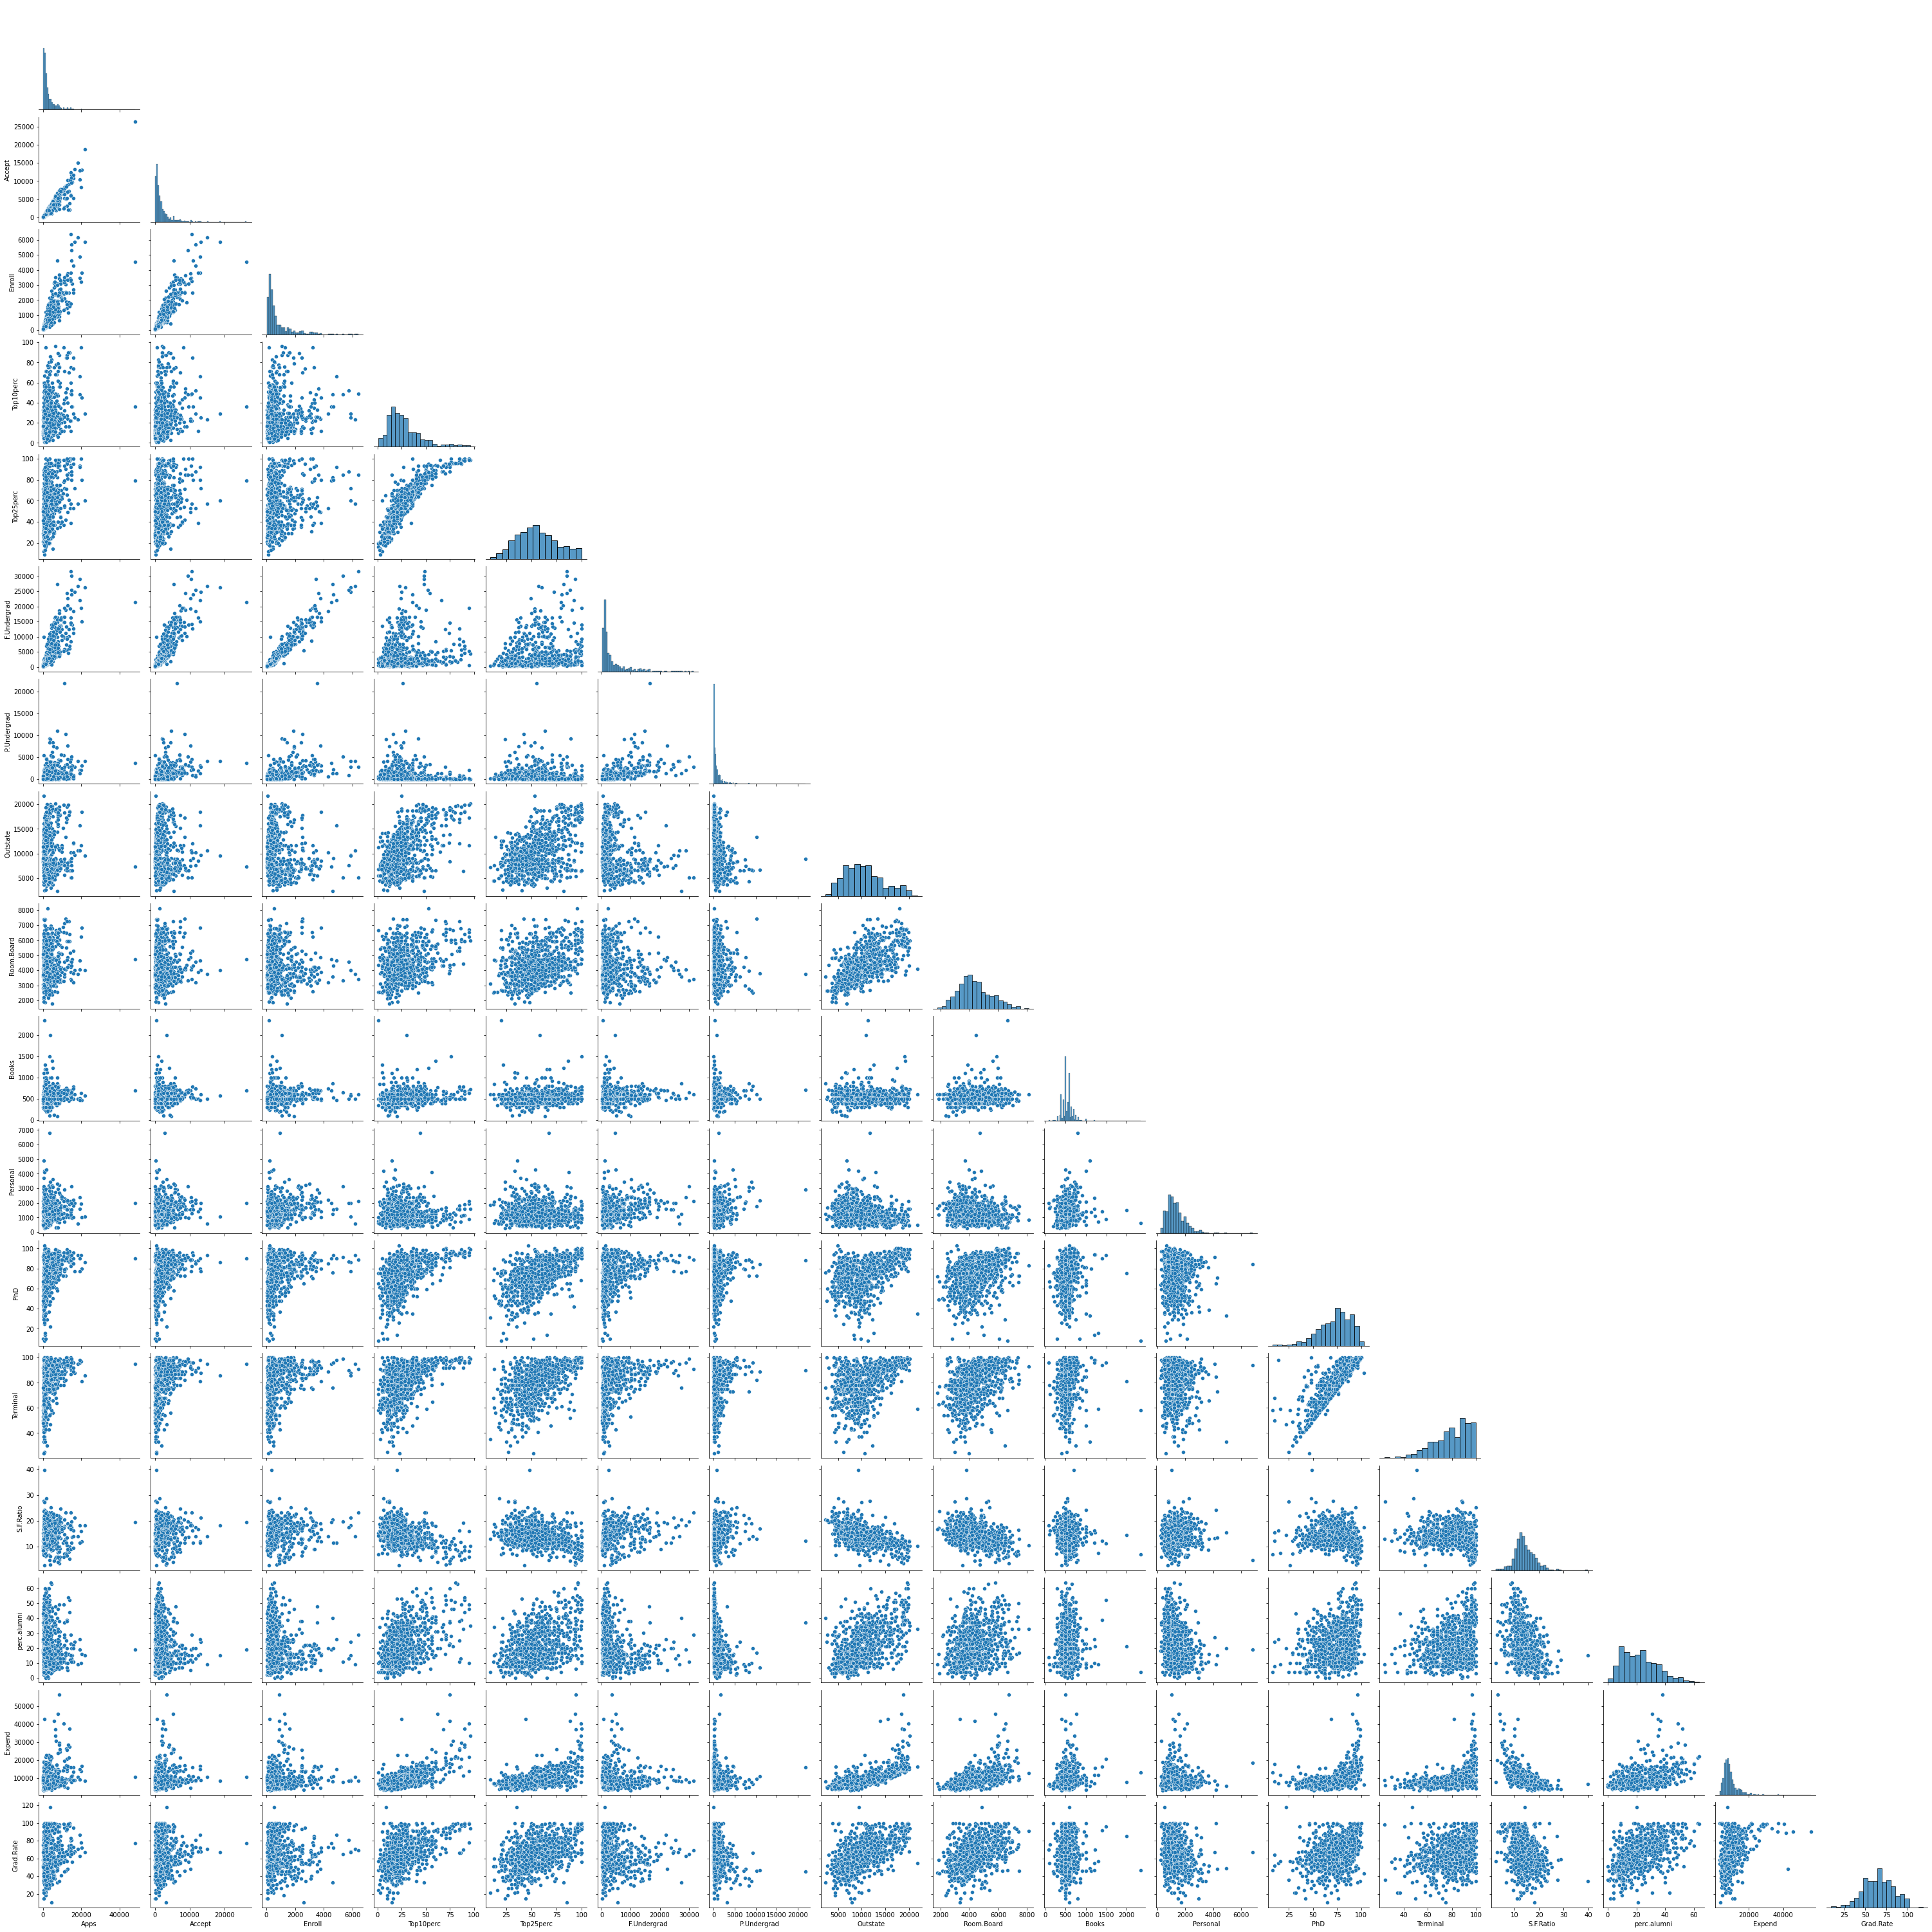

In [29]:
sns.pairplot(df,corner=True)

In [30]:
#Drop the Names column as PCA works only on continuous data.
df1=df.drop(['Names'],axis=1)
df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
def outlier_remover(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [32]:
feature_list=df1.columns
for i in feature_list:
    LL,UL=outlier_remover(df1[i])
    df1[i]=np.where(df1[i]>UL,UL,df1[i])
    df1[i]=np.where(df1[i]<LL,LL,df1[i])

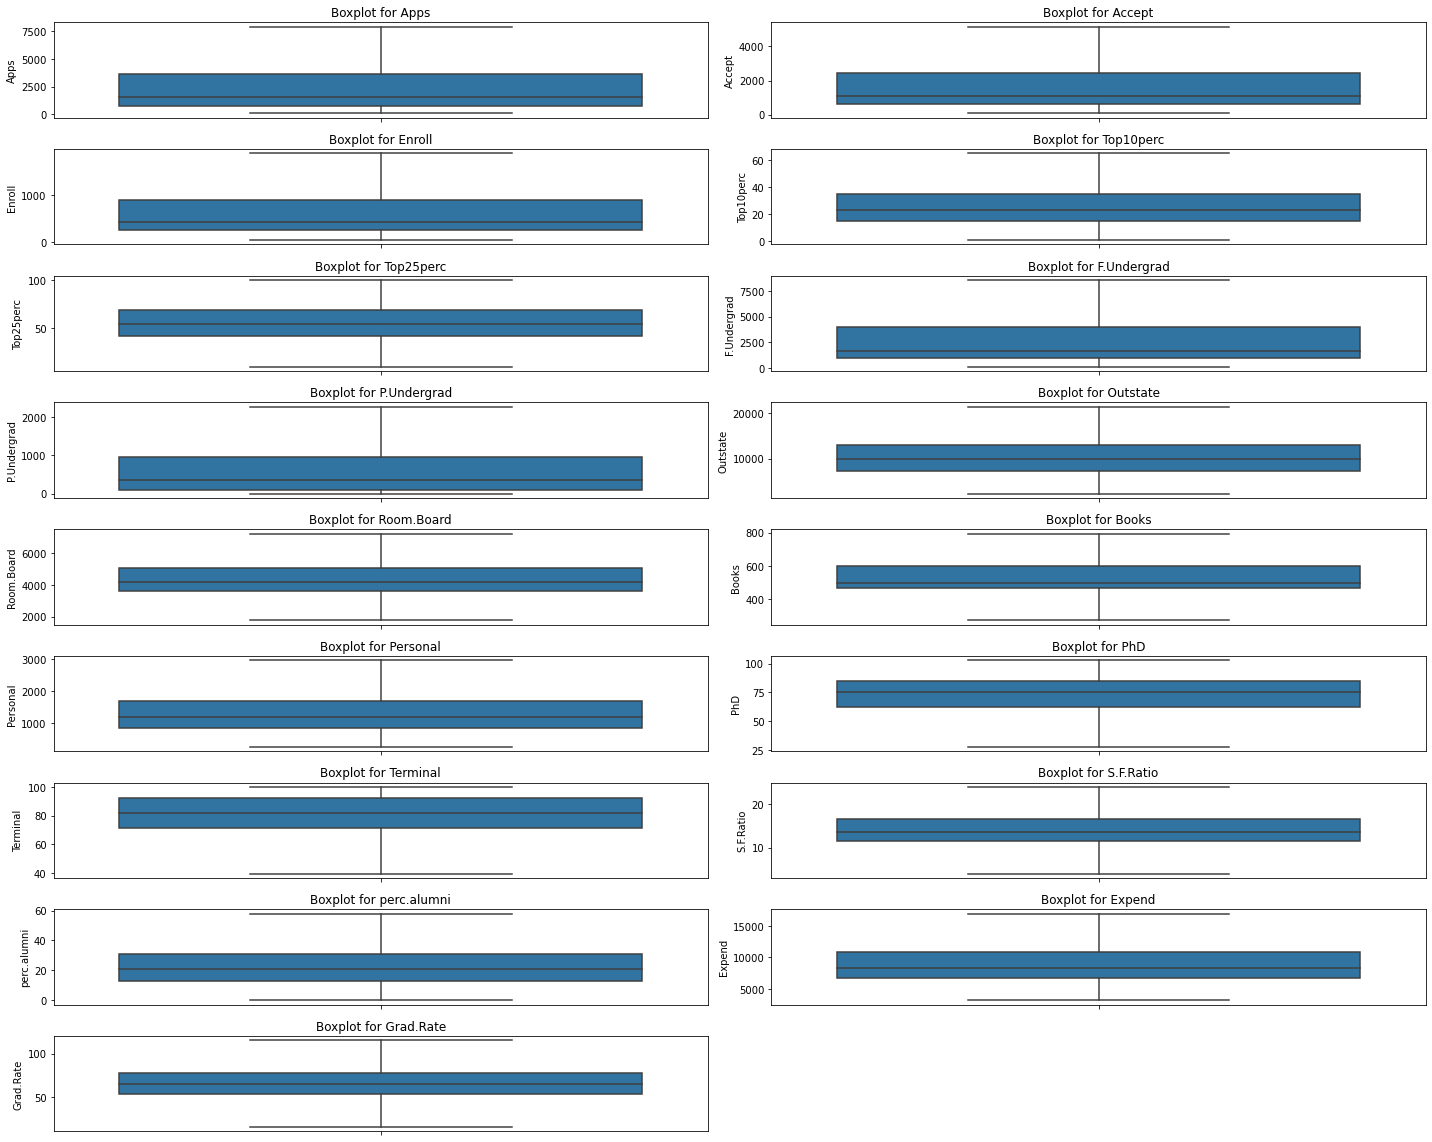

In [33]:
plt.figure(figsize=(20,30))
feature_list=df1.columns
for i in range(len(feature_list)):
    plt.subplot(17,2,i+1)
    sns.boxplot(y=df1[feature_list[i]],data=df1)
    plt.title('Boxplot for {}'.format(feature_list[i]))
    plt.tight_layout()

In [34]:
#Standardization before processing PCA
df2=df1.apply(zscore)
df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


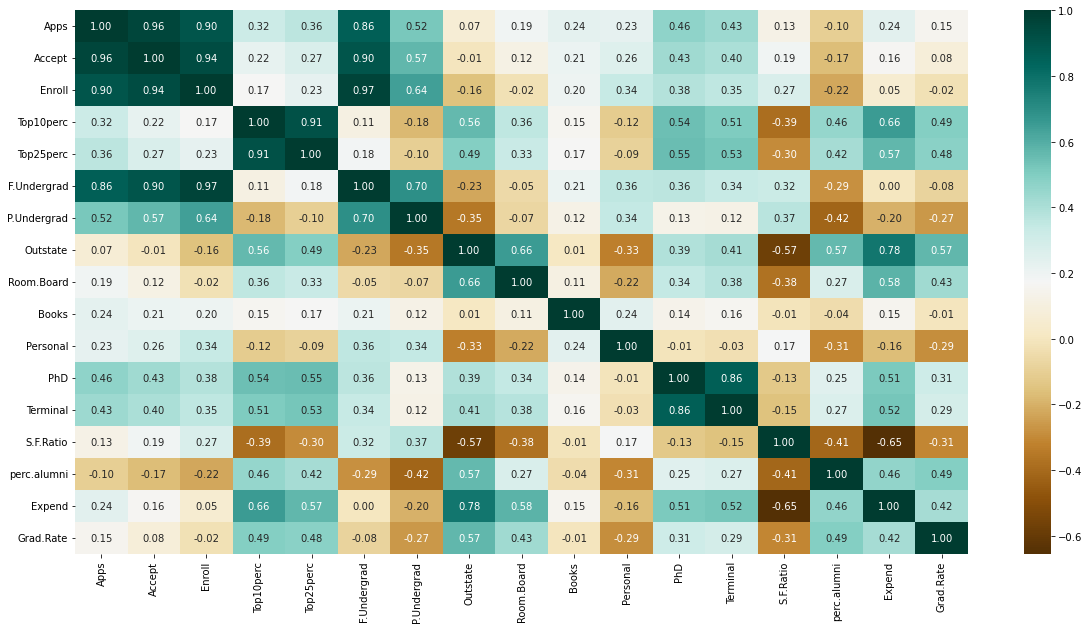

In [35]:
plt.figure(figsize=(20,10))
d=df2.corr()
sns.heatmap(df2.corr(),annot=True,cmap='BrBG',fmt='.2f')
d

In [36]:
cov_martix=np.cov(df2.T)
cov_martix

array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01,  1.50997775e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01,  7.90839722e-02],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02, -2.3

<AxesSubplot:>

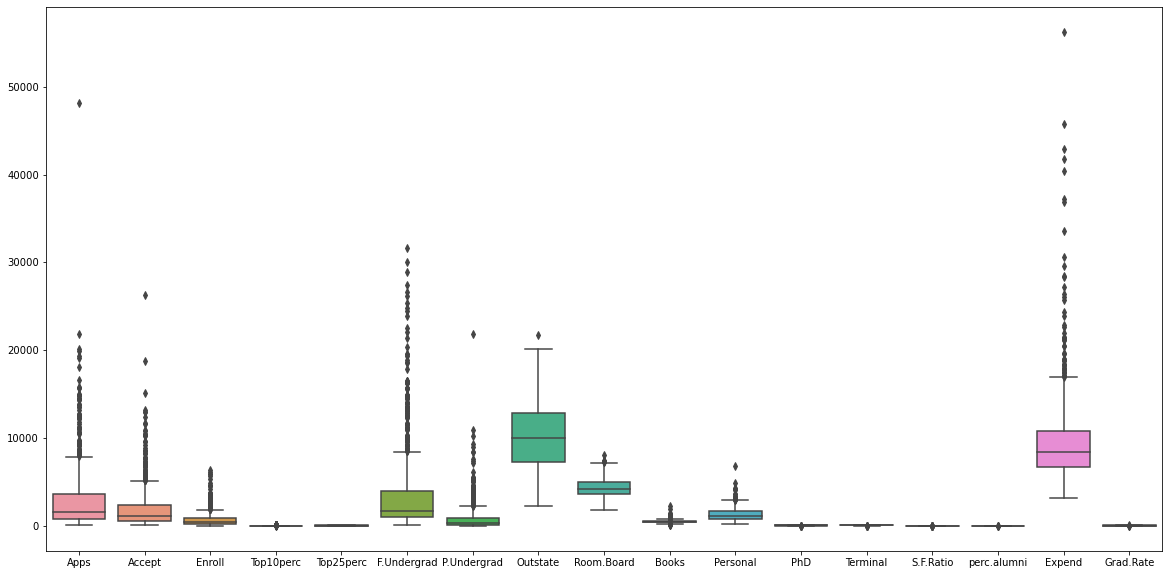

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [38]:
df3=df.drop(['Names'],axis=1)

In [39]:
df4=df3.apply(zscore) #Scaling Without treating outlier

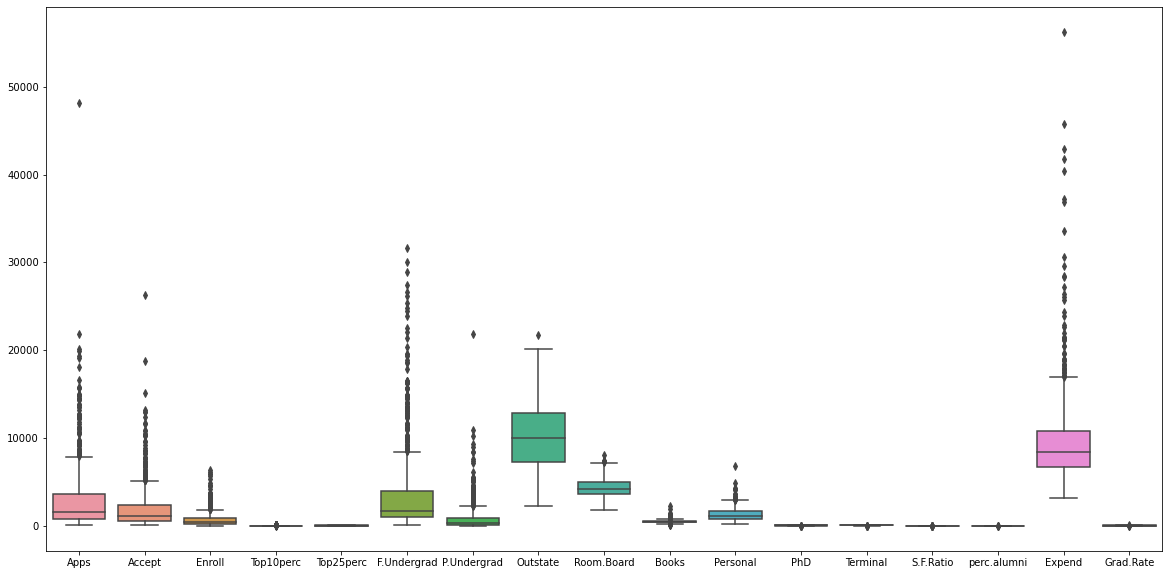

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_plot);

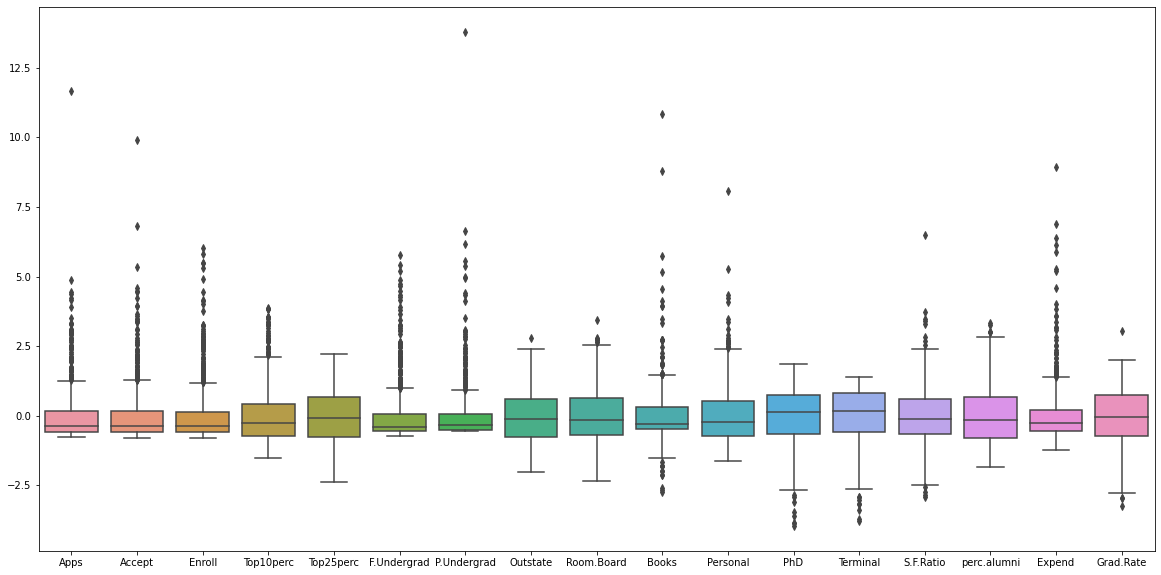

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df4); #boxplot after scaling and with treating outlier

In [42]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


In [43]:
pca=PCA(n_components=17,random_state=123)
transformed=pca.fit_transform(df4)

In [44]:
#Extract Eigenvector
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [45]:
#Extract Eigenvalues
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [46]:
pca.fit(df4)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8',
                                 'PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],
                        index=df4.columns)
print(loadings)

                  PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.

In [47]:
print(pca.components_.round(2)[:1])

[[ 0.25  0.21  0.18  0.35  0.34  0.15  0.03  0.29  0.25  0.06 -0.04  0.32
   0.32 -0.18  0.21  0.32  0.25]]


In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [49]:
pca_new=PCA(n_components=8,random_state=123)
transformed_new=pca_new.fit_transform(df4)

In [50]:
pca_new.components_.round(3)

array([[ 0.249,  0.208,  0.176,  0.354,  0.344,  0.155,  0.026,  0.295,
         0.249,  0.065, -0.043,  0.318,  0.317, -0.177,  0.205,  0.319,
         0.252],
       [ 0.332,  0.372,  0.404, -0.082, -0.045,  0.418,  0.315, -0.25 ,
        -0.138,  0.056,  0.22 ,  0.058,  0.046,  0.247, -0.247, -0.132,
        -0.169],
       [-0.063, -0.101, -0.083,  0.035, -0.024, -0.061,  0.14 ,  0.047,
         0.149,  0.677,  0.5  , -0.127, -0.066, -0.29 , -0.147,  0.227,
        -0.208],
       [ 0.281,  0.268,  0.162, -0.052, -0.11 ,  0.1  , -0.159,  0.131,
         0.185,  0.087, -0.231, -0.535, -0.519, -0.161,  0.017,  0.079,
         0.269],
       [ 0.006,  0.056, -0.056, -0.395, -0.427, -0.043,  0.302,  0.223,
         0.561, -0.127, -0.222,  0.14 ,  0.205, -0.079, -0.216,  0.076,
        -0.109],
       [-0.016,  0.008, -0.043, -0.053,  0.033, -0.043, -0.191, -0.03 ,
         0.163,  0.641, -0.331,  0.091,  0.155,  0.487, -0.047, -0.298,
         0.216],
       [-0.042, -0.013, -0.028, -0

In [51]:
pca_new.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222])

In [52]:
pca_new.fit(df4)

# Reformat and view results
loadings_new = pd.DataFrame(pca_new.components_.T.round(2),
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
                        index=df4.columns)
print(loadings_new)

              PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68
Expend       0.32 -0.13  0.23  0.08  0.0

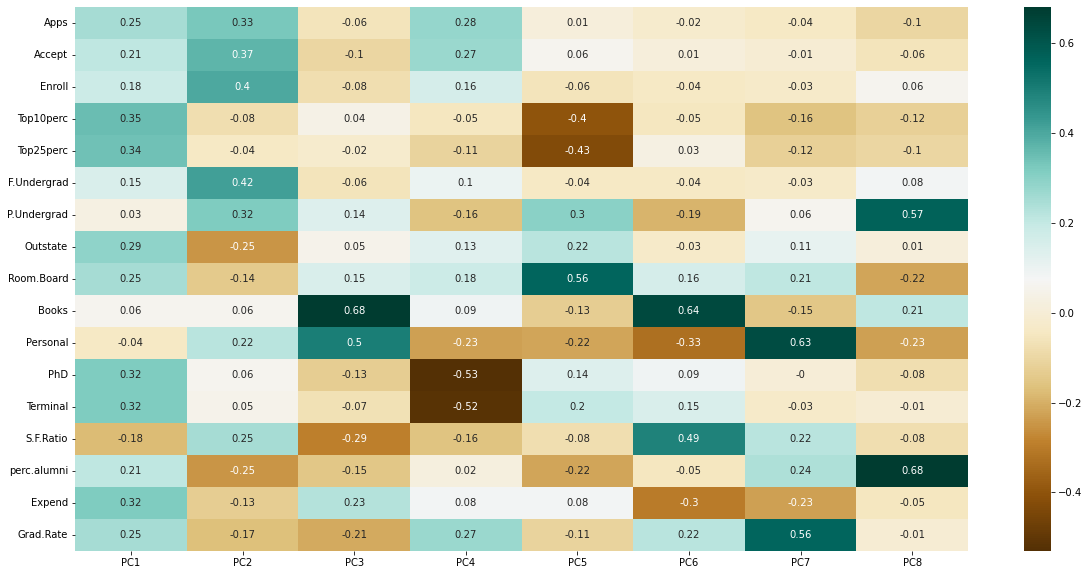

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(loadings_new,cmap='BrBG',annot=True);